In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import seaborn as sb
import math
from datetime import date
from windrose import WindroseAxes
import matplotlib.animation as animation

In [2]:
a = 2
T = 7
h = 20
g = 9.81
x = np.arange(0,200,0.1)
t = np.arange(0,100,1)

# eta = a*cos(k*x - omega*t)

In [3]:
omega = 2*np.pi/T
L0 = (g/(2*np.pi))*(T**2)
K0 = (2*np.pi)/L0
L = L0*(np.tanh(np.sinh(np.sqrt(K0*h))))
K = (2*np.pi)/L

In [4]:
T = np.array([7,7,7,4,4,4,600,600])
h = np.array([100,10,1,100,10,1,1000,100])
L0 = (g/(2*np.pi))*(T**2)
K0 = (2*np.pi)/L0
L = L0*(np.tanh(np.sinh(np.sqrt(K0*h))))
c = L/T
cg = c/2
h_L = h/L

In [5]:
chart = pd.DataFrame([T,h,L,c,cg,h_L])
chart = chart.T
chart.columns = ['T','h','L','c','cg','h/L']
chart['DP/I/SW'] = ['DP','I','SW','DP','I','I','SW','SW']
chart

,T,h,L,c,cg,h/L,DP/I/SW
0,7.0,100.0,76.504186,10.929169,5.464585,1.307118,DP
1,7.0,10.0,59.375014,8.482145,4.241072,0.168421,I
2,7.0,1.0,21.621094,3.088728,1.544364,0.046251,SW
3,4.0,100.0,24.980960,6.245240,3.122620,4.003049,DP
4,4.0,10.0,24.521215,6.130304,3.065152,0.407810,I
5,4.0,1.0,11.987436,2.996859,1.498429,0.083421,I
6,600.0,1000.0,59316.363428,98.860606,49.430303,0.016859,SW
7,600.0,100.0,18789.049883,31.315083,15.657542,0.005322,SW


In [4]:
for i in t:
    eta = a*np.cos((K*x) - (omega*i))
    

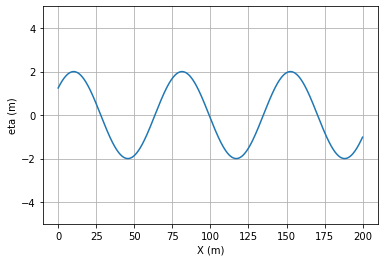

In [5]:
plt.plot(x, eta)
plt.grid()
plt.ylim(-5,5)
plt.xlabel('X (m)')
plt.ylabel('eta (m)')
plt.show()

In [12]:
H1 = 2;
a1 = H1/2;
T1 = 6;
H2 = 1.5;
a2 = H2/2;
T2 = 4.5;
x = np.arange(0,500);
t = np.arange(1,200)

h = 20;
g = 9.81;
L01 = (g/(2*math.pi))*T1**2;
L02 = (g/(2*math.pi))*T2**2;
k01 = 2*math.pi/L01;
k02 = 2*math.pi/L02;
L1 = L01*math.tanh(math.sinh(math.sqrt(k01*h)));
L2 = L02*math.tanh(math.sinh(math.sqrt(k02*h)));
k1 = 2*math.pi/L1;
k2 = 2*math.pi/L2;
omega1 = 2*math.pi/T1;
omega2 = 2*math.pi/T2;

(-5.0, 5.0)

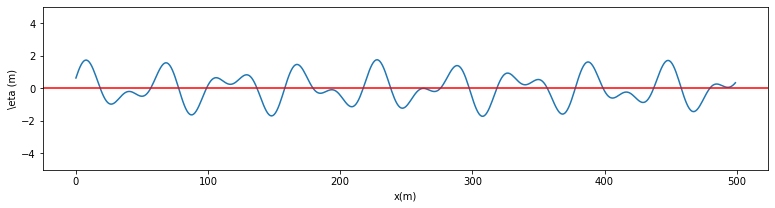

In [46]:
for i in range(1,len(t)):
    eta1 = a1*np.cos(k1*x - omega1*t[i])
    eta2 = a2*np.cos(k2*x - omega2*t[i])
    eta = eta1+eta2

plt.figure(figsize=(13,3))    

plt.plot(x,eta)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('x(m)')
plt.ylabel('\eta (m)')
plt.ylim(-5,5)

In [74]:
H_m = np.array([2.1,3.1,1.8,2.4])
T_s = np.array([7.5,8.5,6.5,7.0])
L_m = np.array([83.8,102.7,64.9,74.3])
k_m = 2*math.pi/L_m
theta = np.arange(0,90,10)

In [75]:
k_sh = np.sqrt(1/((np.tanh(k_m*H_m))*(1+(2*k_m*H_m/(np.sinh(2*k_m*H_m))))))

In [108]:
k_r = []
for i in range(0,len(theta)-1):
    x = np.sqrt(np.cos(np.deg2rad(theta[i]))/np.cos(np.deg2rad(theta[i+1])))
    k_r.append(x)
    

In [110]:
H = k_sh * k_r * H_m

ValueError: operands could not be broadcast together with shapes (4,) (8,) 

In [112]:
k_r, k_sh

([1.0076837856618241,
  1.0237238499309955,
  1.0416638493931227,
  1.0632572007031678,
  1.0916746734234561,
  1.1338320948769613,
  1.209091477135433,
  1.4034299077703938],
 array([1.79668879, 1.64307424, 1.71096869, 1.59104372]))

In [100]:
np.deg2rad(10)

0.17453292519943295

In [101]:
np.cos(0.17453292519943295)

0.984807753012208

Text(0, 0.5, 'z(m)')

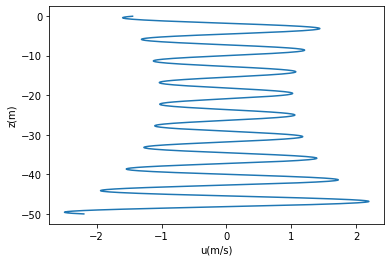

In [28]:
# Particle velocity

T = 10
H = 3
h = 20
a = 2
g = 9.81
omega = 2*np.pi/T
L0 = (g/(2*np.pi))*(T**2)
K0 = (2*np.pi)/L0
L = L0*(np.tanh(np.sinh(np.sqrt(K0*h))))
K = (2*np.pi)/L
x = np.arange(-50,50,0.1)
t = np.arange(0,100,0.1)
z = np.arange(-50,0,0.05)
u = (a*g*K/omega)*((np.cosh(K*(h+z)))/np.cosh(K*h))*(np.cos(K*x-omega*t))
plt.plot(u,z)
plt.xlabel('u(m/s)')
plt.ylabel('z(m)')

Text(0, 0.5, 'z (m)')

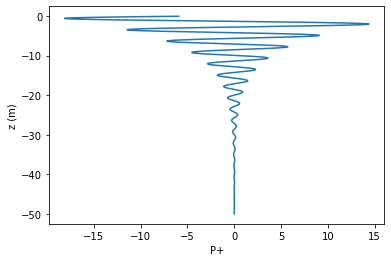

In [56]:
# Exess pressure

T = 5
H = 1
h = 100
a = 2
g = 9.81
roh = 1.02
omega = 2*np.pi/T
L0 = (g/(2*np.pi))*(T**2)
K0 = (2*np.pi)/L0
L = L0*(np.tanh(np.sinh(np.sqrt(K0*h))))
K = (2*np.pi)/L
x = np.arange(-50,50,0.1)
t = np.arange(0,100,0.1)
z = np.arange(-50,0,0.05)
n = a*np.cos(K*x-omega*t)
Kp = np.cosh(K*(h+z))/(np.cosh(K*h))
P_plus = roh * g * n * Kp


plt.plot(P_plus, z)
plt.xlabel('P+')
plt.ylabel('z (m)')

Text(0, 0.5, 'z (m)')

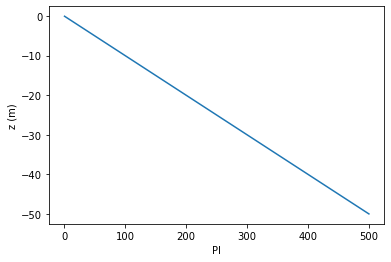

In [57]:
P_I = -roh*g*z

plt.plot(P_I, z)
plt.xlabel('PI')
plt.ylabel('z (m)')

Text(0, 0.5, 'z (m)')

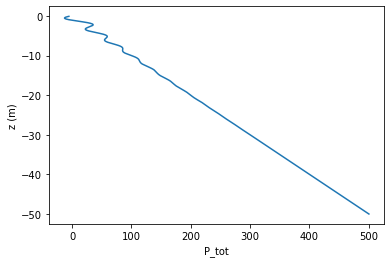

In [58]:
P_tot = P_plus + P_I
plt.plot(P_tot, z)
plt.xlabel('P_tot')
plt.ylabel('z (m)')

In [146]:
H0 = 1
T = 6
theta0 = 30
omega = 2*np.pi/T
g = 9.81
L0 = (g/(2*np.pi))*(T**2)
K0 = (2*np.pi)/L0

h = np.arange(100,-1,-2)
x = np.arange(2500,-1,-100)
L = L0*(np.tanh(np.sinh(np.sqrt(K0*h))))
c = L/T
cg = c/2

In [147]:
theta = []
theta0 = 30

for i in range(len(c)-1):
    m = (c[i]/c[i+1])
    s = m*np.sin(np.deg2rad(theta0))
    t = np.rad2deg(np.arcsin(s))
    theta.append(t)
    theta0 = t
    

C:\Users\fadak\AppData\Local\Temp/ipykernel_5204/1286928142.py:7: RuntimeWarning: invalid value encountered in arcsin
  t = np.rad2deg(np.arcsin(s))
C:\Users\fadak\AppData\Local\Temp/ipykernel_5204/1286928142.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  m = (c[i]/c[i+1])


In [148]:
Kr_i = []
for i in range(len(theta)-1):
    x = np.sqrt(np.cos(np.deg2rad(theta[i]))/np.cos(np.deg2rad(theta[i+1])))
    Kr_i.append(x)

In [149]:
Ks_i = []
for i in range(len(cg)):
    x = np.sqrt((cg[i-1]+1)/cg[i-1])
    Ks_i.append(x)
    
Ks_i = [x for x in Ks_i if str(x) != 'inf']

C:\Users\fadak\AppData\Local\Temp/ipykernel_5204/3946554800.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.sqrt((cg[i-1]+1)/cg[i-1])


In [161]:
H = []
H0 = 1

for i in range(len(Kr_i)):
    x = Kr_i[i]*Ks_i[i]*H0
    H.append(x)
    H0 = x

Text(0, 0.5, 'H(m)')

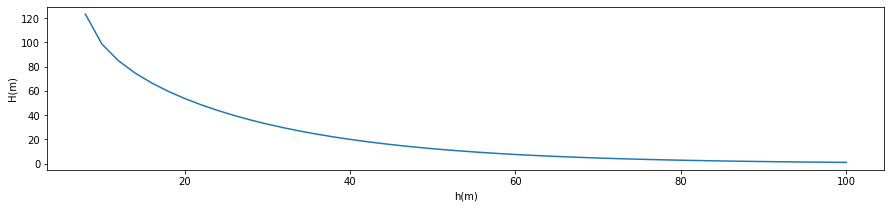

In [156]:
plt.figure(figsize=(15,3))
h = np.arange(100,2,-2)
plt.plot(h, H)
plt.xlabel('h(m)')
plt.ylabel('H(m)')

In [170]:
Hmax = 0.78*h
H = np.array(H)

Text(0, 0.5, 'H(m)')

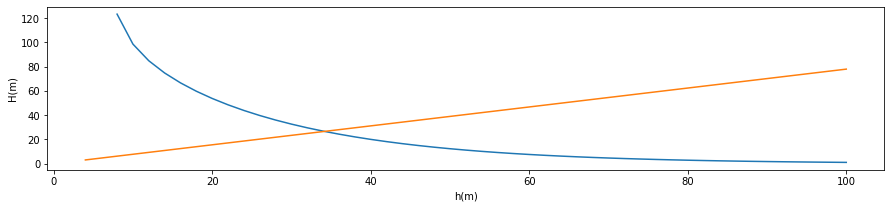

In [172]:
plt.figure(figsize=(15,3))
plt.plot(h, H)
plt.plot(h, Hmax)
plt.xlabel('h(m)')
plt.ylabel('H(m)')

In [179]:
Hi = []
for i in range(len(Hmax)):
    x = min(Hmax[i], H[i])
    Hi.append(x)

Text(0, 0.5, 'H(m)')

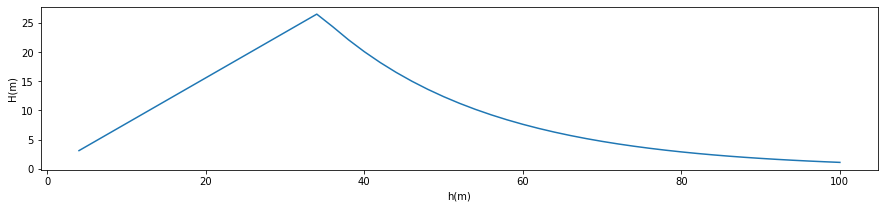

In [180]:
plt.figure(figsize=(15,3))
plt.plot(h, Hi)
plt.xlabel('h(m)')
plt.ylabel('H(m)')